In [1]:
import seaborn as sns
import scanpy as sc
import os
import anndata as ad
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

import os
import pickle


%matplotlib inline
sc.settings.verbosity = 0
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig6"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# scRNA

In [ ]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_T_ILC_atlas_scrna.h5ad'
adata=sc.read_h5ad(PATH)

In [ ]:
adata.obs["Patient_status"].value_counts()

In [ ]:
adata.obs["Patient_status"].nunique()

In [6]:
adata.obs["dataset_id"].nunique()

45

In [4]:
file_path = "/nfs/team298/ls34/color_for_adult_skin2.pkl"

with open(file_path, "rb") as f:
    palette_dict = pickle.load(f)         
    
colors = palette_dict

In [5]:
NEW_CELLS = {
    "Th2": "#2A6072",      # Dark Blue (classic, strong contrast)
    "Tfh-like": "#AAA9A9",  # Neon Blue (bright, electric tone)
    "Th17": "#FFB3B3",
     #   "TRM_IL13+": "#7D93C7"
    
}
             
palette_dict = palette_dict | NEW_CELLS
adata.obs['lvl4_annotation'] =adata.obs['lvl4_annotation'] .astype('category') 
adata.uns['lvl4_annotation_colors'] = [palette_dict.get(cat, '#D3D3D3')  for cat in adata.obs['lvl4_annotation'].cat.categories]



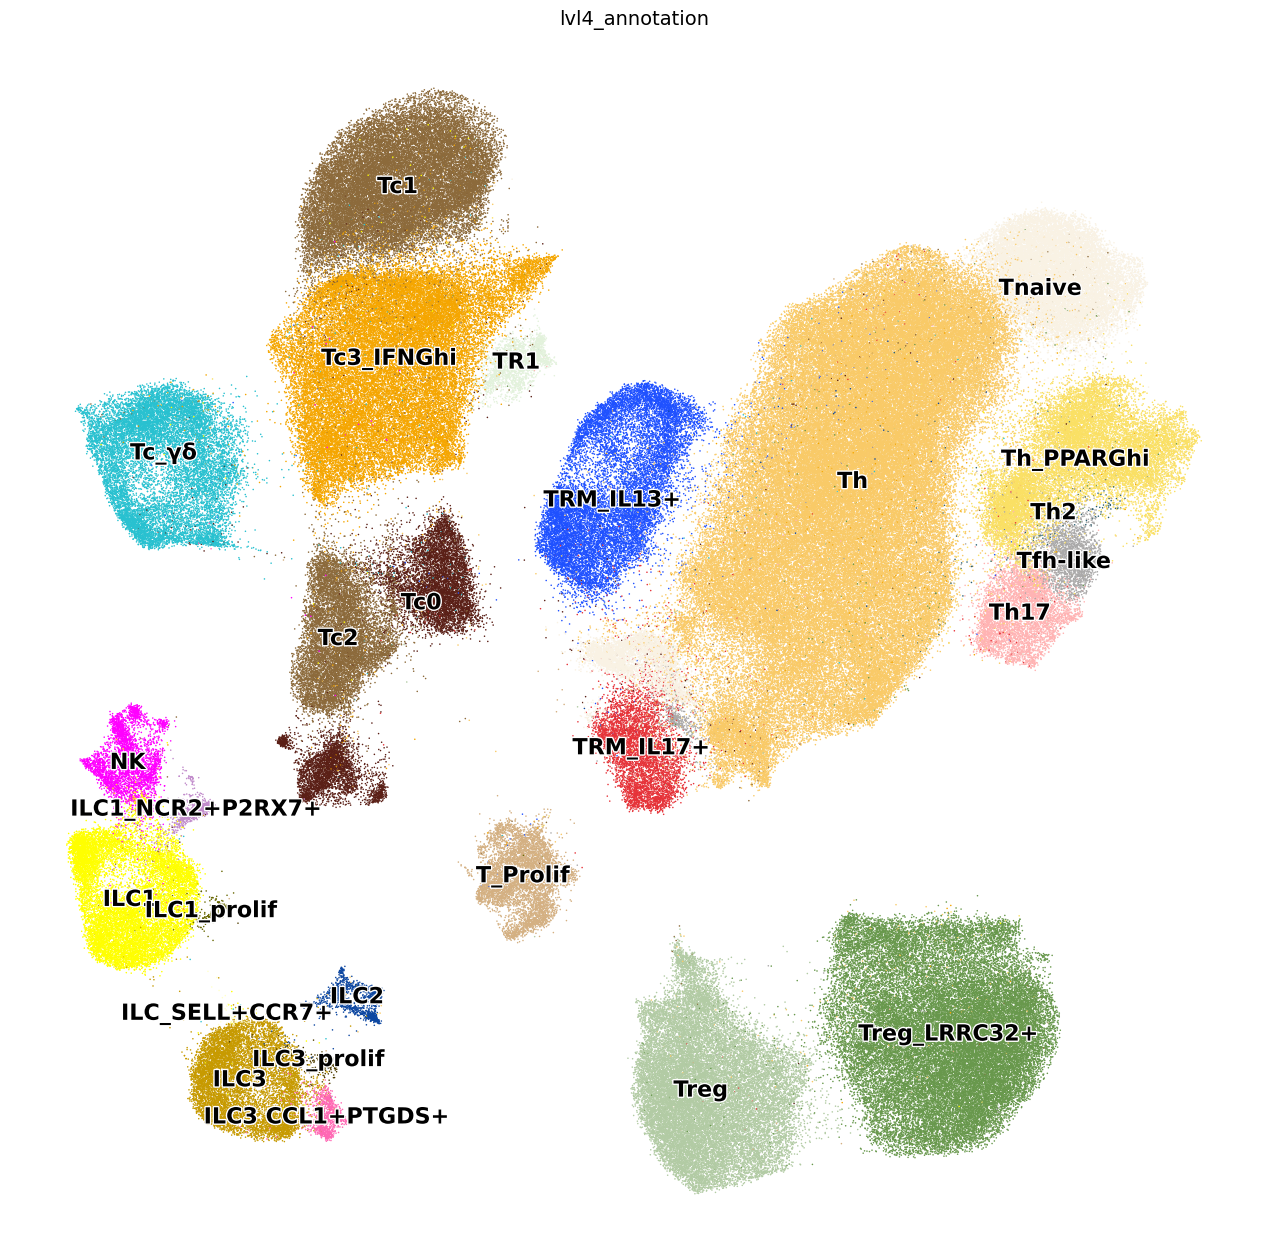

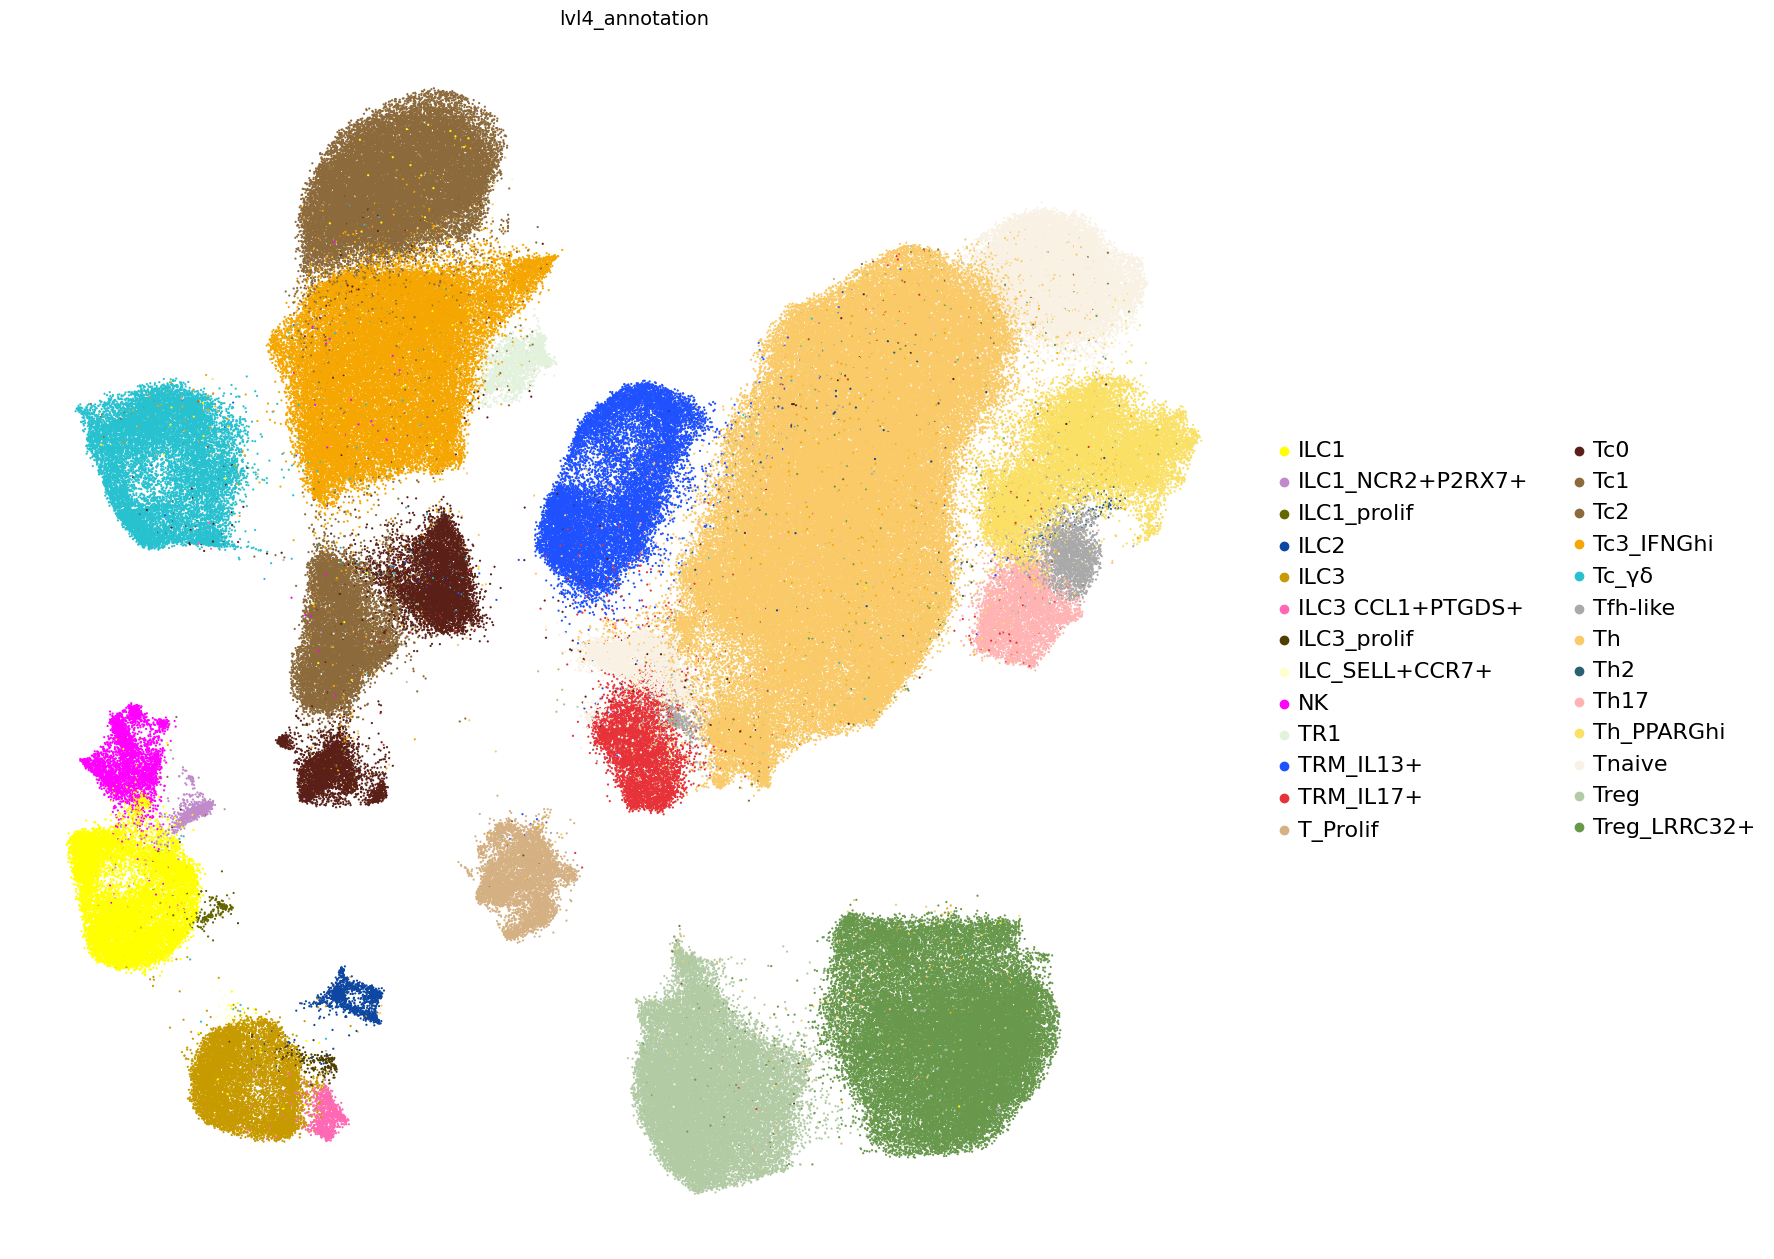

In [6]:
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(16,16))

sc.pl.umap(
    adata,
    color=[
        'lvl4_annotation',  
    ],
    legend_loc="on data",
    s=5, 
    legend_fontoutline=2,
    legend_fontsize=16,
        save="6d_umap.pdf"

)

sc.pl.umap(
    adata,
    color=[
        'lvl4_annotation',  
    ],
    #legend_loc="on data",
    s=10, 
    legend_fontoutline=2,
    legend_fontsize=16
)


# tfh like

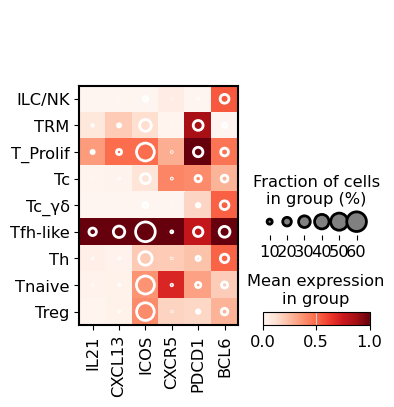

In [7]:
TFH_GENES =['IL21', "CXCL13", "ICOS", 'CXCR5', 'PDCD1', 'BCL6', 
           ]

dp =sc.pl.DotPlot(adata, 
              TFH_GENES,
              groupby="tfh_plot",
                 standard_scale="var",
            #ot_max=.7,
                      vmax=1,
           #categories_order = ORDER, #[x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
             # save="T_scrna.pdf",
                          # colorbar_title="Mean expression\n(minmax norm.)"

             ) 

dp =  dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
               dot_max=.6)
          
dp.savefig("fig6/tfh_dotplot.pdf", dpi=300)       
    

In [8]:
# which datasets have "nonlesional" Tfh?
adata_tfh = adata[adata.obs["lvl4_annotation"]=="Tfh-like"]
adata_tfh[adata_tfh.obs.Patient_status=="Healthy"].obs.dataset_id.value_counts()

dataset_id
Ganier                 157
GA_Wang                 38
AA_Greenleaf            14
HS_Moran                 9
Dermalsheath_Ahlers      6
Reynolds                 4
DRESS                    3
Church_Healthy           2
SSc_Ma                   2
GSE264508_GSE264508      1
Lupus_Dunlap             1
Localized SSc            1
Name: count, dtype: int64

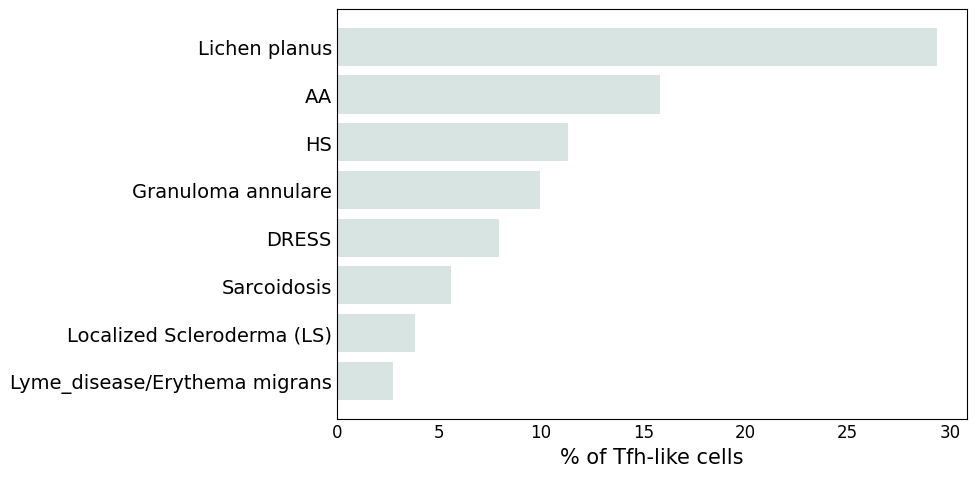

In [9]:
# -----------------------------------------------------------
# 1) isolate Tfh-like cells
# -----------------------------------------------------------
adata=adata[adata.obs["Patient_status2"]!="Nonlesional"]
mask    = adata.obs["lvl4_annotation"] == "Tfh-like"
tfh_obs = adata.obs[mask]

# -----------------------------------------------------------
# 2) top-8 disease contributors (% of those cells)
# -----------------------------------------------------------
disease_pct = (
    tfh_obs["Patient_status2"]
    .value_counts(normalize=True)
    .mul(100)
    .nlargest(8)
    .sort_values(ascending=True)
)

# -----------------------------------------------------------
# 3) horizontal bar plot — larger canvas, no text labels
# -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))   # bigger overall

ax.barh(
    disease_pct.index,
    disease_pct.values,
    color="#d8e4e2"
)

# aesthetics
ax.set_xlabel("% of Tfh-like cells", fontsize=15)  # larger x-label font
ax.set_ylabel("")
ax.tick_params(axis="x", labelsize=12, length=0)
ax.tick_params(axis="y", length=0)
ax.grid(False)

# border on all sides
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(True)

plt.tight_layout()

# -----------------------------------------------------------
# 4) save figure
# -----------------------------------------------------------
fig.savefig("fig6/6d_Tfh_contributors.pdf", dpi=300, bbox_inches="tight")
plt.show()

# Fig 4f (TRMs)

/tmp/ipykernel_3067006/3975407649.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts   = tmp.groupby(ds_col)[["TRM_IL13+", "TRM_IL17+"]].sum()
/tmp/ipykernel_3067006/3975407649.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals   = tmp.groupby(ds_col).size()
/tmp/ipykernel_3067006/3975407649.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(


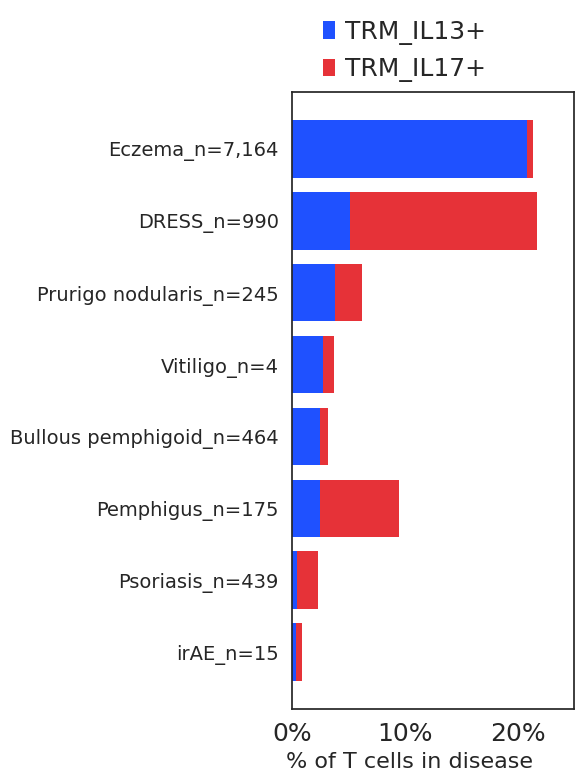

In [10]:
# ───────────────────────────────────────────────────────────────
# 0.  isolate lesional data
# ───────────────────────────────────────────────────────────────
adata_iii = adata[adata.obs["Site_status"] == "Lesional"]

# ───────────────────────────────────────────────────────────────
# 1.  Boolean masks for the two TRM flavours
# ───────────────────────────────────────────────────────────────
mask_13 = adata_iii.obs["lvl4_annotation"].str.startswith("TRM_IL13")
mask_17 = adata_iii.obs["lvl4_annotation"].str.startswith("TRM_IL17")

# ───────────────────────────────────────────────────────────────
# 2.  aggregate counts per Patient_status and compute proportions
# ───────────────────────────────────────────────────────────────
ds_col = "Patient_status"

tmp = pd.DataFrame({
    ds_col:         adata_iii.obs[ds_col].values,
    "TRM_IL13+":    mask_13.values.astype(int),
    "TRM_IL17+":    mask_17.values.astype(int)
})

counts   = tmp.groupby(ds_col)[["TRM_IL13+", "TRM_IL17+"]].sum()
totals   = tmp.groupby(ds_col).size()
props    = counts.div(totals, axis=0)

# ───────────────────────────────────────────────────────────────
# 3.  keep only the ten Patient_status groups with most TRM_IL13+
#     cells, then sort small→large for cleaner barh stacking
# ───────────────────────────────────────────────────────────────
TOP_N=8

props_sorted = (
    props
    .nlargest(TOP_N, "TRM_IL13+")
    .sort_values(by=["TRM_IL13+", "TRM_IL17+"], ascending=[True, True])
)

# absolute cell counts (for y-tick labels)
totals_top8 = totals.loc[props_sorted.index]

# ───────────────────────────────────────────────────────────────
# 4.  colour palette (helper + greys fallback)
# ───────────────────────────────────────────────────────────────
def first_colour_starting_with(prefix, palette, default):
    for k, v in palette.items():
        if k.startswith(prefix):
            return v
    return default

trm_cols   = ["TRM_IL13+", "TRM_IL17+"]
other_cols = [c for c in props.columns if c not in trm_cols]
plot_cols  = trm_cols + other_cols

palette = [
    "#FFFFFF" if c == "Other"
    else first_colour_starting_with(c, colors, "#D3D3D3")
    for c in plot_cols
]

# ───────────────────────────────────────────────────────────────
# 5.  horizontal stacked bar plot
# ───────────────────────────────────────────────────────────────
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(6, 8))

left = np.zeros(len(props_sorted))
for idx, c in enumerate(plot_cols):
    ax.barh(
        props_sorted.index,
        props_sorted[c],
        left=left,
        color=palette[idx],
        edgecolor="none",
        linewidth=0,
        label=None if c == "Other" else c
    )
    left += props_sorted[c]

# ───────────────────────────────────────────────────────────────
# 6.  cosmetics
# ───────────────────────────────────────────────────────────────
# X-axis
ax.set_xlabel(
    "% of T cells in disease",
    fontsize=16,
    loc="left"             # ← shift label to the left
)
# fine-tune vertical offset (optional)
ax.xaxis.set_label_coords(-0.02, -0.07)   # x, y in axes fraction

ax.set_xlim(0, 0.25)
ax.set_xticks([0, 0.1, 0.2])
ax.set_xticklabels([f"{p:.0%}" for p in [0, 0.1, 0.2]], fontsize=18)
ax.tick_params(axis="x", which="major", length=6, width=1.2, labelsize=18)

totals_ILCs = counts.sum(axis=1)   # total ILCs per disease
totals_top10 = totals_ILCs.loc[props_sorted.index]

yticklabels = [
    f"{d}_n={n:,}" if n >= 10_000 else f"{d}_n={n}"
    for d, n in totals_top8.items()
]
ax.set_yticklabels(
    [f"{d}_n={totals_top10[d]:,}" for d in props_sorted.index],
    fontsize=14
)
ax.set_ylabel("")

# full borders
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(True)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, labels,
    bbox_to_anchor=(.4, .98),
    loc="lower center",
    ncol=1,
    frameon=False,
    fontsize=18
)

plt.tight_layout()
plt.savefig(
    "figures/fig3e_TRM_bypatientstatus_topbars_fixedxlabel2.pdf",
    dpi=300, bbox_inches="tight"
)
plt.show()

/tmp/ipykernel_3067006/2443528841.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts   = tmp.groupby(ds_col)[ILC_TYPES].sum()   # absolute counts
/tmp/ipykernel_3067006/2443528841.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals   = tmp.groupby(ds_col).size()             # total cells / disease
/tmp/ipykernel_3067006/2443528841.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=24)


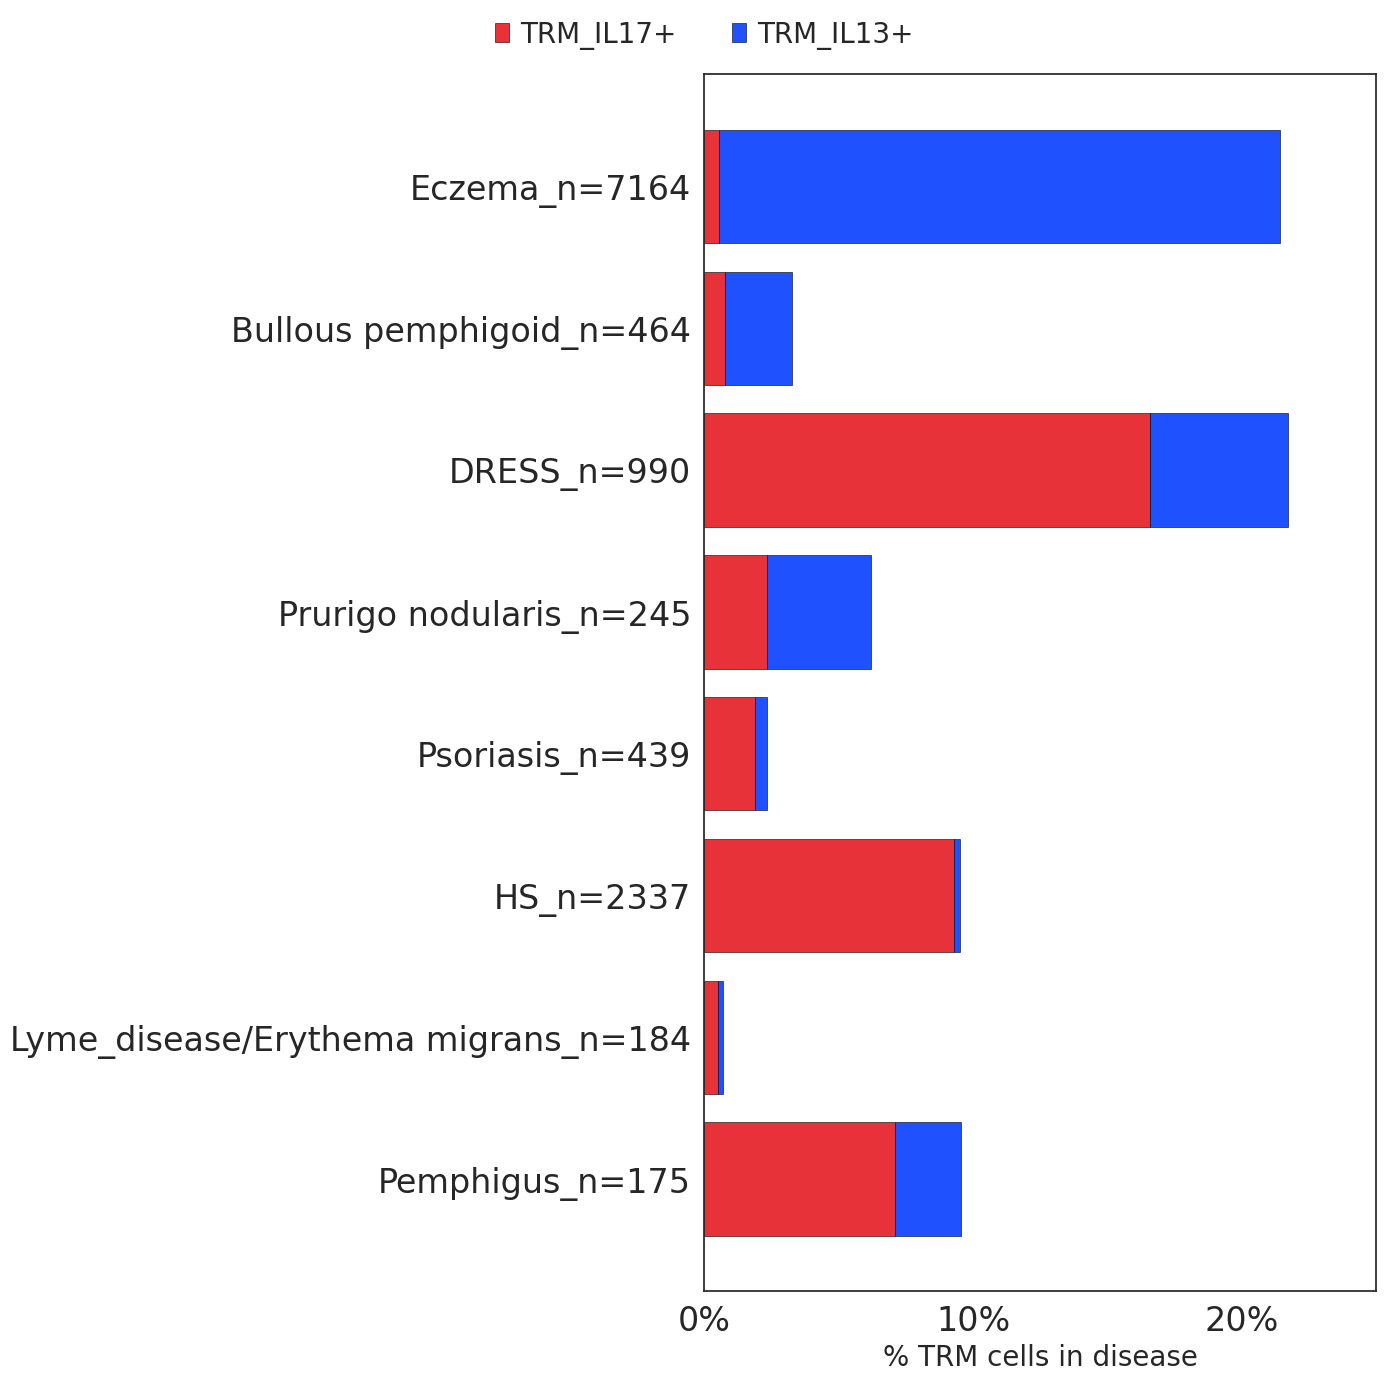

In [11]:
TOP_N=8
# ──────────────────────────────────────────────────────────────
# 0.  isolate lesional data
# ──────────────────────────────────────────────────────────────
adata_iii = adata[adata.obs["Site_status"] == "Lesional"]

# ──────────────────────────────────────────────────────────────
# 1.  target cell-type flavours
#     “ILC3 CCL1+PTGDS+” must stay first in ILC_TYPES
# ──────────────────────────────────────────────────────────────
ILC_TYPES = [
    "TRM_IL17+",  "TRM_IL13+", 
    #"NK",
]

# Boolean masks per cell type
obs_labels = adata_iii.obs["lvl4_annotation"]
masks = {ct: obs_labels.str.startswith(ct) for ct in ILC_TYPES}

# ──────────────────────────────────────────────────────────────
# 2.  aggregate counts per Patient_status
# ──────────────────────────────────────────────────────────────
ds_col = "Patient_status"

df_dict = {ds_col: adata_iii.obs[ds_col].values}
for ct in ILC_TYPES:
    df_dict[ct] = masks[ct].values.astype(int)

tmp      = pd.DataFrame(df_dict)
counts   = tmp.groupby(ds_col)[ILC_TYPES].sum()   # absolute counts
totals   = tmp.groupby(ds_col).size()             # total cells / disease
props    = counts.div(totals, axis=0)             # proportions

# ──────────────────────────────────────────────────────────────
# 3.  keep top-8 diseases by ILC3 CCL1+PTGDS+ count
# ──────────────────────────────────────────────────────────────
top8_diseases = (
    counts
    .nlargest(TOP_N, "TRM_IL13+")
    .index
)

totals_top8  = totals.loc[props_sorted.index]
# Preserve TRM_IL13+ ordering from counts
props_sorted = props.loc[top8_diseases, ILC_TYPES]

# OR explicitly sort by TRM_IL13+ counts, descending
props_sorted = props_sorted.loc[
    counts.loc[top8_diseases].sort_values("TRM_IL13+", ascending=True).index
]
# ──────────────────────────────────────────────────────────────
# 4.  colour palette  (dict `colors` already in session)
# ──────────────────────────────────────────────────────────────
def lookup(name, palette, default="#D3D3D3"):
    for k, v in palette.items():
        if k.startswith(name):
            return v
    return default

palette = [lookup(ct, colors) for ct in ILC_TYPES]

# ──────────────────────────────────────────────────────────────
# 5.  horizontal stacked bar plot
# ──────────────────────────────────────────────────────────────
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(14, 14))      # wide for legend room

left = np.zeros(len(props_sorted))
for idx, ct in enumerate(ILC_TYPES):
    ax.barh(
        props_sorted.index,
        props_sorted[ct],
        left=left,
        color=palette[idx],
        edgecolor="black", linewidth=0.4,     # fine black bar outline
        label=ct
    )
    left += props_sorted[ct]

# ──────────────────────────────────────────────────────────────
# 6.  cosmetics
# ──────────────────────────────────────────────────────────────
ax.set_xlabel("% TRM cells in disease", fontsize=20)
ax.set_ylabel("")                 # no y-axis title

# X-axis ticks (025 %)
ax.set_xlim(0, 0.25)
ax.set_xticks([0, 0.1, 0.2])
ax.set_xticklabels([f"{p:.0%}" for p in [0, 0.1, 0.2]], fontsize=24)
ax.tick_params(axis="x", which="major", length=6, width=1.2, labelsize=24)

totals_ILCs = counts.sum(axis=1)   # total ILCs per disease
totals_top8 = totals_ILCs.loc[props_sorted.index]

yticklabels = [
    f"{d}_n={n:,}" if n >= 10_000 else f"{d}_n={n}"
    for d, n in totals_top8.items()
]
# Y-tick labels with comma separator if n ≥ 10 000
yticklabels = [
    f"{d}_n={n:,}" if n >= 10_000 else f"{d}_n={n}"
    for d, n in totals_top8.items()
]
ax.set_yticklabels(yticklabels, fontsize=24)

# full border
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(True)

# ──────────────────────────────────────────────────────────────
# 7.  legend: two rows centred ABOVE the plot
# ──────────────────────────────────────────────────────────────
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, labels,
    bbox_to_anchor=(0.0, 1.0),    # center, a bit above the axes
    loc="lower center",
    ncol=5,                        # 8 items → 2 rows of 4
    frameon=False,
    fontsize=20
)

plt.tight_layout()
plt.savefig(
    "figures/fig3e_TRM_bypatientstatus_topbars_fixedxlabel2.pdf",
    dpi=300, bbox_inches="tight"
)
plt.show()

In [12]:
T_DICT = {   "Tissue-residency\n markers": ["CD4", "CD8A", "ITGAE",  "CD109", 'ZNF683', "ENTPD1", # "RBPJ"
                                        "ITGAV"
                                       ],
# 'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
#         # "NBAS", 
#          'CCL1', #"CCL17", 
#          "AREG", "CCR8", "IL9R", #"CCR4", "CCR10"
#         ],
 'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R",
         "CCR6","RORC", 'TNFRSF8', "ADAM12", #"IL1R1", #"IL12RB2",
            'LRRN3',         'MYO7A',  "VDR", #"CD38",
       
         ],
         "Other": [    "PTPN13","ITGA1", "IFNG"],
         # "ITGA1hi": ["ITGA1", 
         #             'ZHX2',# 'TRPS1', 'TBC1D22A', 'ABLIM1', 
         #             'BICD1',#'MVB12B', 
         #             'PRR5L', # 'PCNX4', 'EPHA4', 
         #             'ST8SIA1', 
         #             'ZNF407',],
         #"Memory": ["CD69",],
#               'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
#                              "NSG1", #"LINC02446","CD9", 
#                               "MPZL2", "KLRC2"], #'TRGC2', 
          
          "TRM1" : ["CTSH", "MAPKAPK3", "RTL8C", "KAT5", 
        "SMARCD3", "SV2C", "UBXN6", "PHEX", "ZNF524", "UBQLN4", "EXOSC4", "CAMK1", "NKIRAS2", "ANKRD40",
        "ZNF23", "COPG2", "PARP6", "IL13", "CRMP1", "DUSP12", "MAK16", "RCAN1", "PTGES2", "CCDC22", "TCEANC2", "RYR1",
        "AP1S1", "NME6",  "UMPS",
        "HMOX1", "EGLN3", "ITGB8", "SORD", "RNF135", "CCL20", "COL6A3", "MMAB", "C3orf14", "LRRC1",
        "ZNF71", "PCBP4", "FAM86C1", "DRICH1", "RTKN", 
        
        
        
       ]}


In [13]:
mask_13 = adata_iii.obs["lvl4_annotation"].str.startswith("TRM_IL13")
adata_iiii=adata_iii[mask_13]
adata_iiii.obs["lvl4_annotation"].value_counts()

lvl4_annotation
TRM_IL13+    8113
Name: count, dtype: int64

In [14]:
sc.pp.normalize_total(adata_iiii, target_sum=1e4)
sc.pp.log1p(adata_iiii)


/software/cellgen/team298/ls34/ccc_liana/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/software/cellgen/team298/ls34/ccc_liana/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/software/cellgen/team298/ls34/ccc_liana/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [15]:
T_DICT2 = {   "Tissue-residency\n markers": ["CD4", "CD8A", "ITGAE",  "CD109", 'ZNF683', "ENTPD1", # "RBPJ"
                                        "ITGAV"
                                       ],
'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
        # "NBAS", 
         'CCL1', #"CCL17", 
         "AREG", "CCR8", "IL9R", #"CCR4", "CCR10"
        ],
 'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R",
         "CCR6","RORC", 'TNFRSF8', "ADAM12", #"IL1R1", #"IL12RB2",
            'LRRN3',         'MYO7A',  "VDR", #"CD38",
       
         ],
         "Other": [    "PTPN13","ITGA1", "IFNG"],
         # "ITGA1hi": ["ITGA1", 
         #             'ZHX2',# 'TRPS1', 'TBC1D22A', 'ABLIM1', 
         #             'BICD1',#'MVB12B', 
         #             'PRR5L', # 'PCNX4', 'EPHA4', 
         #             'ST8SIA1', 
         #             'ZNF407',],
         #"Memory": ["CD69",],
#               'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
#                              "NSG1", #"LINC02446","CD9", 
#                               "MPZL2", "KLRC2"], #'TRGC2', 
          
        #   "TRM1" : ["CTSH", "MAPKAPK3", "RTL8C", "KAT5", 
        # "SMARCD3", "SV2C", "UBXN6", "PHEX", "ZNF524", "UBQLN4", "EXOSC4", "CAMK1", "NKIRAS2", "ANKRD40",
        # "ZNF23", "COPG2", "PARP6", "IL13", "CRMP1", "DUSP12", "MAK16", "RCAN1", "PTGES2", "CCDC22", "TCEANC2", "RYR1",
        # "AP1S1", "NME6",  "UMPS",
        # "HMOX1", "EGLN3", "ITGB8", "SORD", "RNF135", "CCL20", "COL6A3", "MMAB", "C3orf14", "LRRC1",
        # "ZNF71", "PCBP4", "FAM86C1", "DRICH1", "RTKN", 
        
        
        
       }


In [16]:
# Step 1: Count the number of cells per Patient_status
T2 = ["Eczema", "Prurigo nodularis", "Bullous pemphigoid", "DRESS"]
adata_iiii=adata_iiii[adata_iiii.obs["Patient_status"].isin(T2)]
counts = adata_iiii.obs["Patient_status"].value_counts()

# Step 2: Identify Patient_status values with at least 20 cells
valid_statuses = counts[counts >= 20].index

# Step 3: Filter the AnnData object
adata_iiii = adata_iiii[adata_iiii.obs["Patient_status"].isin(valid_statuses)].copy()
adata_iiii.obs["Patient_status"].value_counts()
# Step 1: Count cells per group
counts = adata_iiii.obs["Patient_status"].value_counts()

# Step 2: Build new labels like "PatientA (n=123)"
label_map = {group: f"{group} (n={count})" for group, count in counts.items()}

# Step 3: Add a new column with updated labels
adata_iiii.obs["Patient_status_labeled"] = adata_iiii.obs["Patient_status"].map(label_map)

# Step 4: Sort by counts descending
sorted_labels = [label_map[g] for g in counts.index]



# # Step 5: Plot
# sc.pl.matrixplot(
#     adata_iiii,
#     T_DICT2,
#     groupby="Patient_status_labeled",
#     dendrogram=False,
#    # standard_scale="var",
#     categories_order=sorted_labels,
#     #dot_max=.6
#     cmap="Reds",
#     vmax=.7
# )

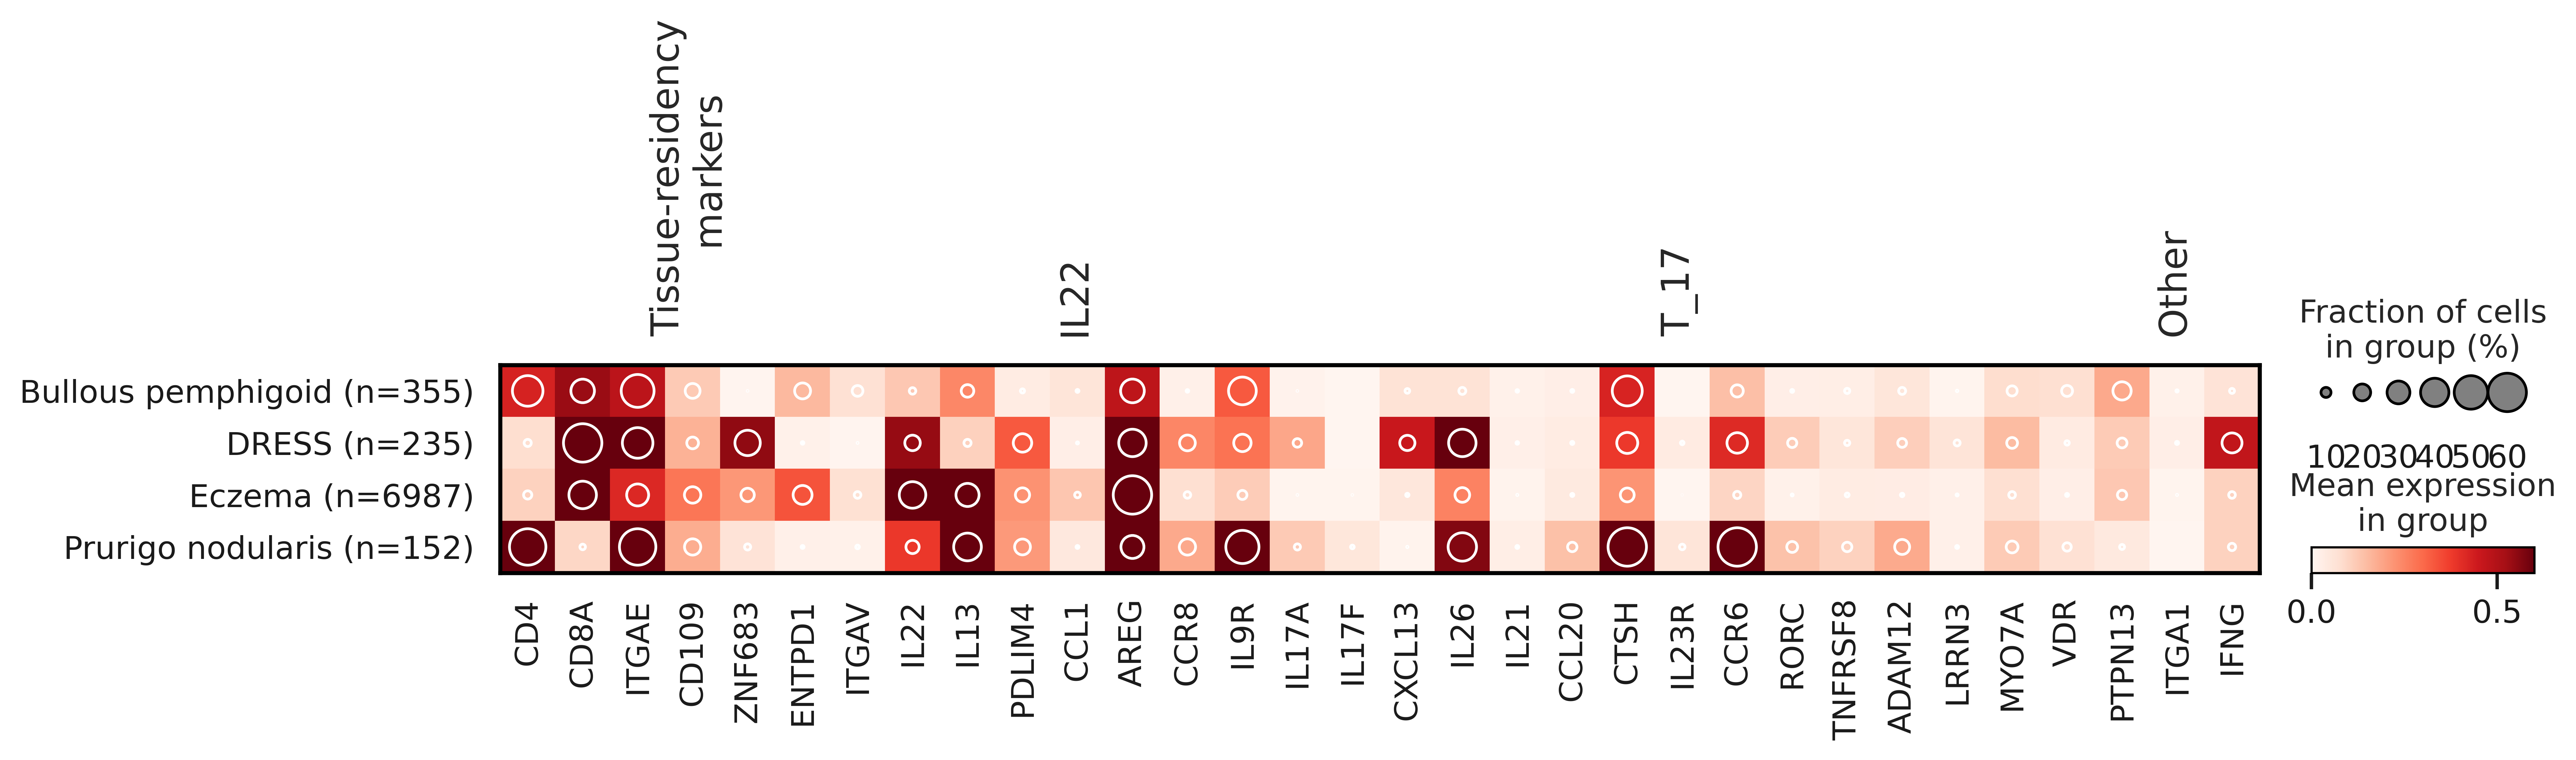

In [17]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(8,8))


sc.pl.DotPlot(
    adata_iiii,
   remove_markers(T_DICT2),
    #swap_axes=True,
    groupby='Patient_status_labeled',
   vmax=.6,
    #    colorbar_title='Mean expression\n(variance scaled)', 
   # standard_scale="var",
   # categories_order=["Treg", "Treg_LRRC32+", "TR1"]
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=.6

          )\
.show()
sc.settings.set_figure_params(dpi=50,dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# ilc

In [18]:
adata_iiii=adata_iii[ (adata_iii.obs["lvl4_annotation"].str.startswith("ILC3"))
                    ]
adata_iiii=adata_iiii[adata_iiii.obs["lvl4_annotation"]!="ILC3_prolif"]
adata_iiii.obs["lvl4_annotation"].value_counts()


lvl4_annotation
ILC3                3354
ILC3 CCL1+PTGDS+     445
Name: count, dtype: int64

In [19]:
sc.pp.normalize_total(adata_iiii, target_sum=1e4)
sc.pp.log1p(adata_iiii)


/software/cellgen/team298/ls34/ccc_liana/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/software/cellgen/team298/ls34/ccc_liana/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/software/cellgen/team298/ls34/ccc_liana/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", 'GZMK', 'OASL', 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             

# Step 1: Count the number of cells per Patient_status
counts = adata_iiii[adata_iiii.obs["lvl4_annotation"]=="ILC3 CCL1+PTGDS+"].obs["Patient_status"].value_counts()

# Step 2: Identify Patient_status values with at least 20 cells
valid_statuses = counts[counts >= 5].index

# Step 3: Filter the AnnData object
adata_iiii = adata_iiii[adata_iiii.obs["Patient_status"].isin(valid_statuses)].copy()
adata_iiii.obs["Patient_status"].value_counts()
# Step 1: Count cells per group
counts = adata_iiii.obs["Patient_status"].value_counts()

# Step 2: Build new labels like "PatientA (n=123)"
label_map = {group: f"{group} (n={count})" for group, count in counts.items()}

# Step 3: Add a new column with updated labels
adata_iiii.obs["Patient_status_labeled"] = adata_iiii.obs["Patient_status"].map(label_map)

# Step 4: Sort by counts descending
sorted_labels = [label_map[g] for g in counts.index]


In [21]:
# adata_iiii.obs["Patient_status_ILC3"] =  adata_iiii.obs["lvl4_annotation"].astype(str)  + "_" +  adata_iiii.obs["Patient_status"].astype(str) 
# sc.pl.dotplot(
#     adata_iiii,
#     ALLT2,
#     groupby="Patient_status_ILC3",
#     dendrogram=False,
#     standard_scale="var",
#    # categories_order=sorted_labels,
#    # dot_max=.6
# )

In [22]:
ILC1_CCL1_GENES = {"ILC3":   ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
    
                    "Polarised": ["MB" ,"KRT86", "NEDD8", "EVL" , "KRT81", "ZNF683", "SIRPG", "PYCARD",
                  "MVP", "SDHC", "KRT14", "NME1", "NCR3", 
                   "CST6",
                  
                  ]}
# # Step 5: Plot
# sc.pl.dotplot(
#     adata_iiii,
#     ILC1_CCL1_GENES,
#     groupby="Patient_status_ILC3",
#     dendrogram=False,
#     standard_scale="var",
#     #categories_order=sorted_labels,
#    # dot_max=.6
# )

In [23]:
# adata_iiii=adata_iii[ (adata_iii.obs["lvl4_annotation"].str.startswith("ILC3 CCL"))|
#                      (adata_iii.obs["lvl4_annotation"].str.startswith("ILC3_CCL"))
#                     ]
# adata_iiii.obs["lvl4_annotation"].value_counts()


In [24]:
# sc.pp.normalize_total(adata_iiii, target_sum=1e4)
# sc.pp.log1p(adata_iiii)


In [25]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", 'GZMK', 'OASL', 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             

# # Step 1: Count the number of cells per Patient_status
# counts = adata_iiii.obs["Patient_status"].value_counts()

# # Step 2: Identify Patient_status values with at least 20 cells
# valid_statuses = counts[counts >= 5].index

# # Step 3: Filter the AnnData object
# adata_iiii = adata_iiii[adata_iiii.obs["Patient_status"].isin(valid_statuses)].copy()
# adata_iiii.obs["Patient_status"].value_counts()
# # Step 1: Count cells per group
# counts = adata_iiii.obs["Patient_status"].value_counts()

# # Step 2: Build new labels like "PatientA (n=123)"
# label_map = {group: f"{group} (n={count})" for group, count in counts.items()}

# # Step 3: Add a new column with updated labels
# adata_iiii.obs["Patient_status_labeled"] = adata_iiii.obs["Patient_status"].map(label_map)

# # Step 4: Sort by counts descending
# sorted_labels = [label_map[g] for g in counts.index]

# # # # Step 5: Plot
# # sc.pl.dotplot(
# #     adata_iiii,
# #     ALLT2,
# #     groupby="Patient_status_labeled",
# #     dendrogram=False,
# #     standard_scale="var",
# #     categories_order=sorted_labels,
# #    # dot_max=.6
# # )

In [26]:
# adata_i=adata[adata.obs["lvl4_annotation"]=="ILC3_CCL1+PTGDS+"]


In [27]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],

          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',
  'PPARG',
  'PTGS2',
  'PLA2G4A',

  'NRROS',     'IL31',
'IL22', 'IL13', 
         ],
 # 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
 #        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 # 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
 #        "RORC+": ["RORC",]
        }

             
adata_iiii=adata_iii[ (adata_iii.obs["lvl4_annotation"].str.startswith("ILC3 CCL"))|
                     (adata_iii.obs["lvl4_annotation"].str.startswith("ILC3_CCL"))
                    ]
adata_iiii.obs["lvl4_annotation"].value_counts()
sc.pp.normalize_total(adata_iiii, target_sum=1e4)
sc.pp.log1p(adata_iiii)

# Step 1: Count the number of cells per Patient_status
counts = adata_iiii.obs["Patient_status"].value_counts()

# Step 2: Identify Patient_status values with at least 20 cells
valid_statuses = counts[counts >= 5].index

# Step 3: Filter the AnnData object
adata_iiii = adata_iiii[adata_iiii.obs["Patient_status"].isin(valid_statuses)].copy()
adata_iiii.obs["Patient_status"].value_counts()
# Step 1: Count cells per group
counts = adata_iiii.obs["Patient_status"].value_counts()

# Step 2: Build new labels like "PatientA (n=123)"
label_map = {group: f"{group} (n={count})" for group, count in counts.items()}

# Step 3: Add a new column with updated labels
adata_iiii.obs["Patient_status_labeled"] = adata_iiii.obs["Patient_status"].map(label_map)

# Step 4: Sort by counts descending
sorted_labels = [label_map[g] for g in counts.index]



/software/cellgen/team298/ls34/ccc_liana/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [28]:
sorted(adata_iiii.obs["Patient_status_labeled"].unique())

['Bullous pemphigoid (n=19)',
 'Eczema (n=356)',
 'Lyme_disease/Erythema migrans (n=9)',
 'Prurigo nodularis (n=11)',
 'Psoriasis (n=32)',
 'Vitiligo (n=5)']

In [29]:
adata_iiii=adata_iiii[adata_iiii.obs["Patient_status_labeled"]!='Psoriasis (n=32)']

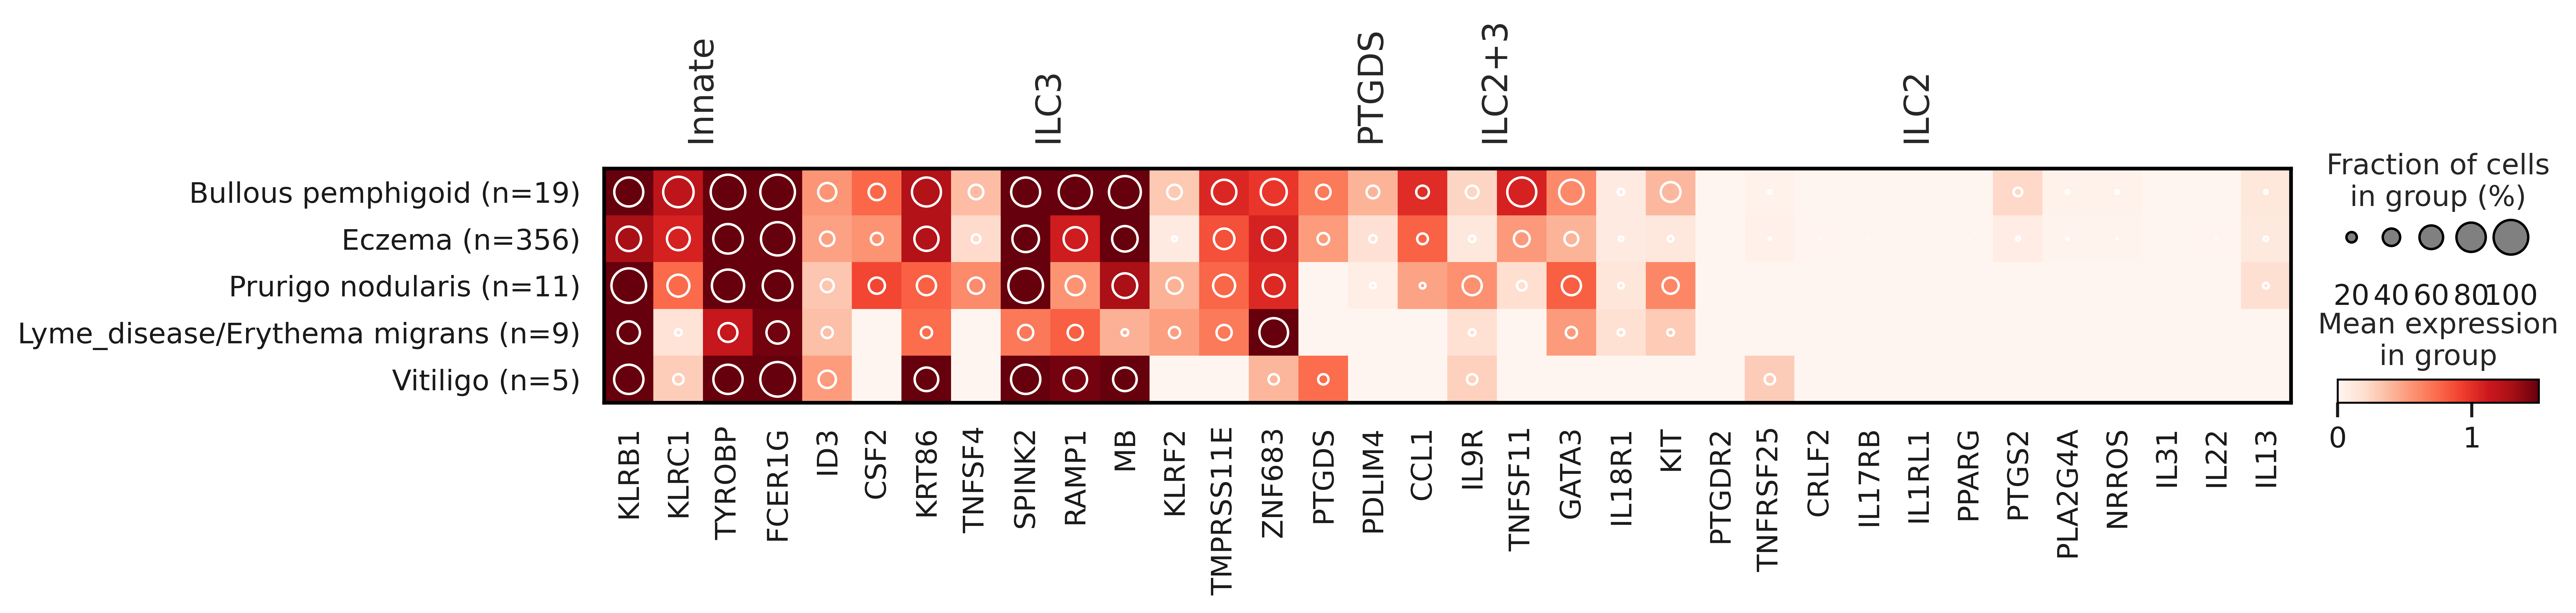

In [30]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(8,8))

sc.pl.DotPlot(
    adata_iiii,
   remove_markers(ALLT2),
    #swap_axes=True,
    groupby="Patient_status_labeled",
   vmax=1.5,
    #    colorbar_title='Mean expression\n(variance scaled)', 
   # standard_scale="var",
    categories_order=['Bullous pemphigoid (n=19)',
 'Eczema (n=356)',
                       'Prurigo nodularis (n=11)',
# 'Psoriasis (n=32)',
 'Lyme_disease/Erythema migrans (n=9)',

 'Vitiligo (n=5)']
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1

          )\
.show()

sc.settings.set_figure_params(dpi=50,dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))



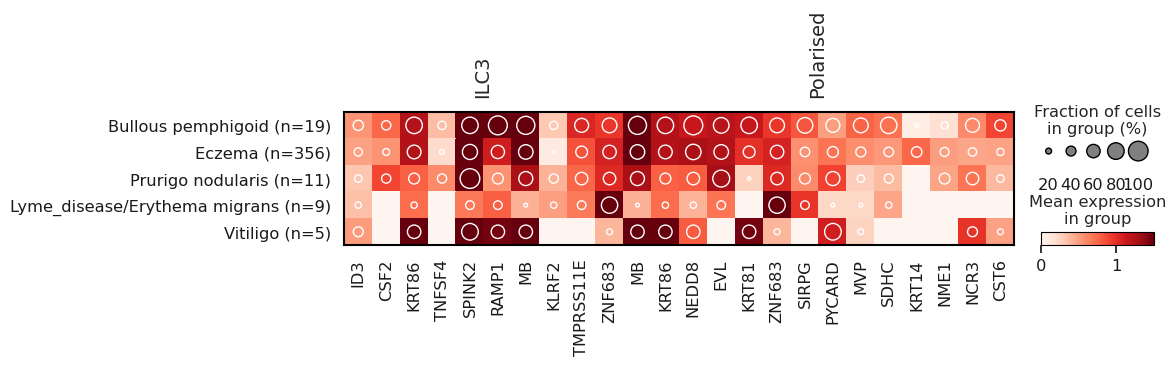

In [31]:


sc.pl.DotPlot(
    adata_iiii,
   remove_markers(ILC1_CCL1_GENES),
    #swap_axes=True,
    groupby="Patient_status_labeled",
   vmax=1.5,
    #    colorbar_title='Mean expression\n(variance scaled)', 
   # standard_scale="var",
    categories_order=['Bullous pemphigoid (n=19)',
 'Eczema (n=356)',
                       'Prurigo nodularis (n=11)',
# 'Psoriasis (n=32)',
 'Lyme_disease/Erythema migrans (n=9)',

 'Vitiligo (n=5)']
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1

          )\
.show()

In [32]:
stop

NameError: name 'stop' is not defined